# Predicting the Survival of Titanic Passengers

## Importing libraries
* <i>pandas</i> for data pre-processing.
* <i>matplotlib.pyplot</i> and <i>seaborn</i> for data visualization.
* <i>sklaern.ensemble.RandomForestClassifier</i> for implementation of Random Forest Classifier.

In [2]:
import pandas as pd 

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

## Importing training and testing datasets
Takeaways -
* 891 rows, 12 columns
* Column description:
    - "PassengerId" - Unique, ranges from 1 to 891
    - "Survived" - whether the passenger survived or not, 0 or 1
    - "Pclass" - class of passenger, 1 or 2 or 3
    - "Name" - Name of the passenger
    - "Sex" - sex of the passenger, male or female
    - "Age" - age of passenger
    - "SibSp" - number of sibling or spouse the passenger had
    - "Parch" - number of parents or children the passenger had
    - "Ticket" - ticket number
    - "Fare" - Fare of the ticket 
    - "Cabin" - Cabin number of the passenger
    - "Embarked" - Place where the passenger embarked from (C = Cherbourg, Q = Queenstown, S = Southampton)


In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
display(train_data.head())
display(train_data.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Visualization

### How many people survived
* Unfortunately, majority of the people didn't survive the Titanic accident.

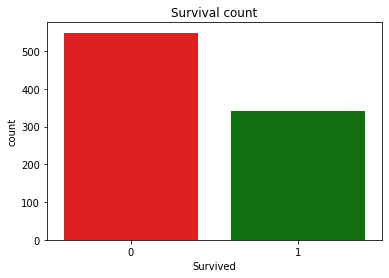

In [4]:
ax = sns.countplot(x="Survived", data=train_data, palette={0:"red",1:"green"});
ax.set_title("Survival count");

### Survival based on "Pclass"
* Majority of the people from class1 survived.
* Almost half of people from class2 survived.
* Majority of the people from class3 did not survive.

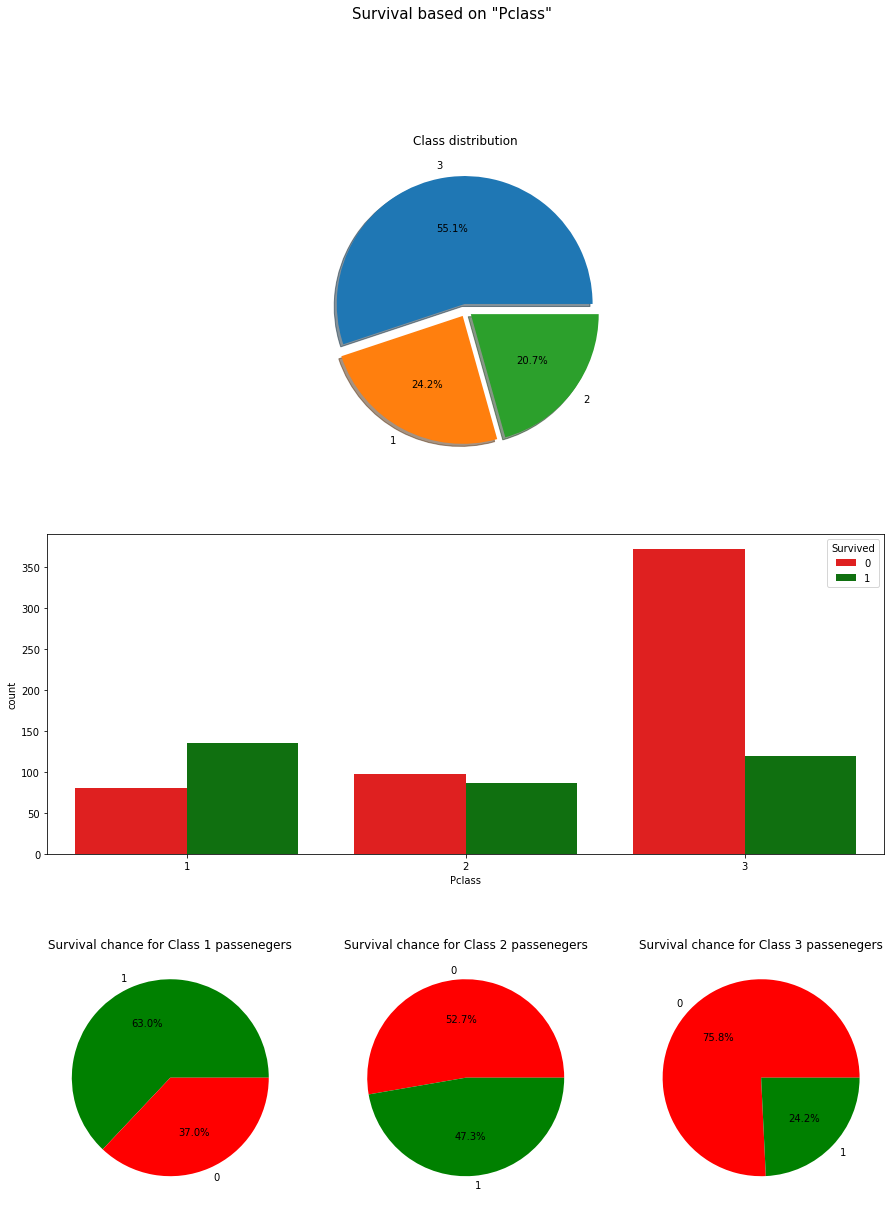

In [5]:
fig = plt.figure(figsize=(15,20))
fig.suptitle("Survival based on \"Pclass\"", fontsize=15);

classplot = train_data["Pclass"].value_counts().to_dict()
val = list(classplot.values())
label = list(classplot.keys())
plt.subplot(3,1,1)
plt.pie(x=val,labels=label, autopct="%.1f%%", explode=(0.05,0.05,0.05), shadow=True);
plt.title("Class distribution");

plt.subplot(3,1,2)
sns.countplot(x="Pclass", hue="Survived", data=train_data, palette={0:"red",1:"green"});

pclass1 = train_data.loc[train_data["Pclass"]==1]
pclass2 = train_data.loc[train_data["Pclass"]==2]
pclass3 = train_data.loc[train_data["Pclass"]==3]

pclass1plot = pclass1["Survived"].value_counts().to_dict()
val = list(pclass1plot.values())
label = list(pclass1plot.keys())
plt.subplot(3,3,7)
plt.pie(x=val,labels=label, colors=["green", "red"], autopct="%.1f%%");
plt.title("Survival chance for Class 1 passenegers");

pclass2plot = pclass2["Survived"].value_counts().to_dict()
val = list(pclass2plot.values())
label = list(pclass2plot.keys())
plt.subplot(3,3,8)
plt.pie(x=val,labels=label, colors=["red", "green"], autopct="%.1f%%");
plt.title("Survival chance for Class 2 passenegers");

pclass3plot = pclass3["Survived"].value_counts().to_dict()
val = list(pclass3plot.values())
label = list(pclass3plot.keys())
plt.subplot(3,3,9)
plt.pie(x=val,labels=label, colors=["red", "green"], autopct="%.1f%%");
plt.title("Survival chance for Class 3 passenegers");

### Survival based on "Sex"
* Lesser proportion of males were able to survive the accident.
* Greater proportion of females were able to survive the accident.

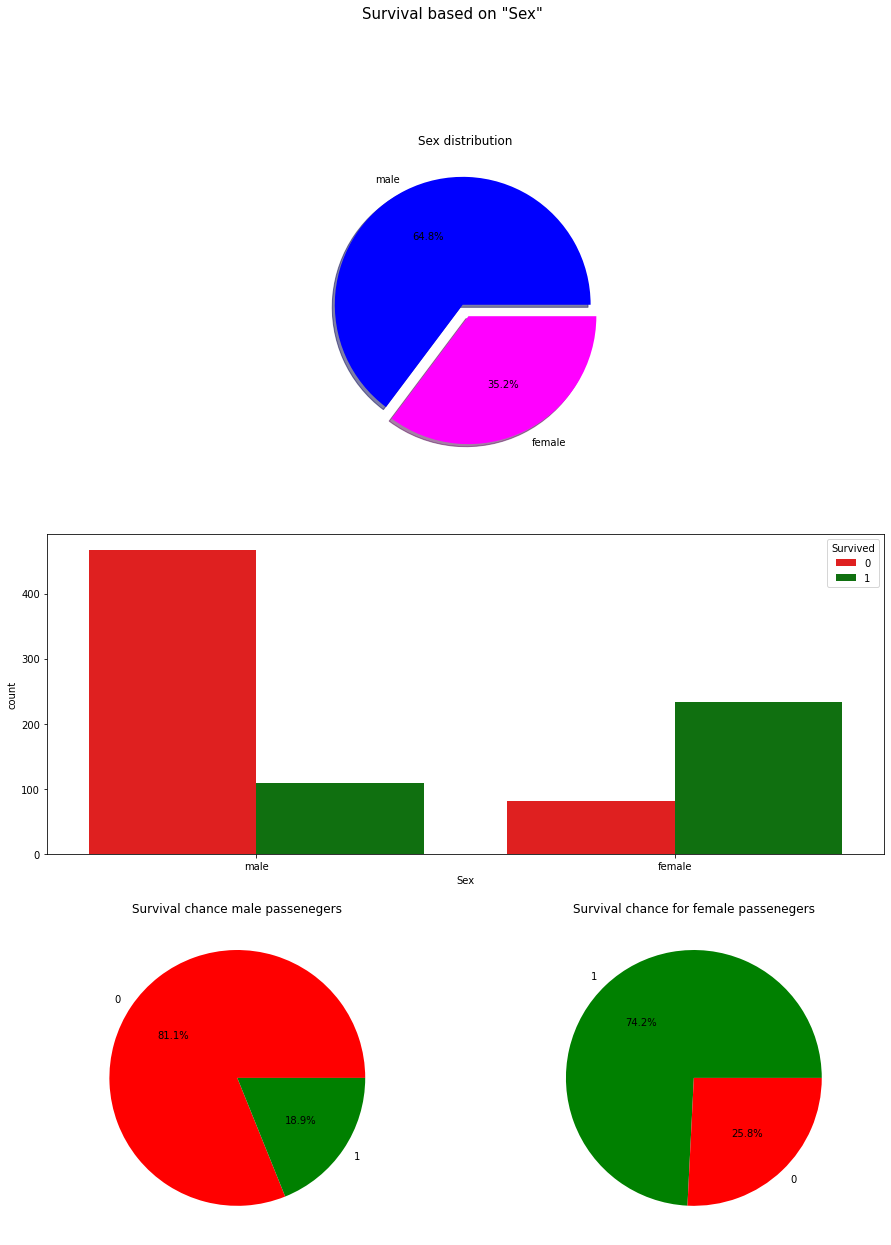

In [6]:
# overlapping box plot
# pie chart
fig = plt.figure(figsize=(15,20))
fig.suptitle("Survival based on \"Sex\"", fontsize=15);

sexplot = train_data["Sex"].value_counts().to_dict()
val = list(sexplot.values())
label = list(sexplot.keys())
plt.subplot(3,1,1)
plt.pie(x=val,labels=label, colors=["blue","magenta"], autopct="%.1f%%", explode=(0.05,0.05), shadow=True);
plt.title("Sex distribution");

plt.subplot(3,1,2)
sns.countplot(x="Sex", hue="Survived", data=train_data, palette={0:"red",1:"green"});

male = train_data.loc[train_data["Sex"]=="male"]
female = train_data.loc[train_data["Sex"]=="female"]

maleplot = male["Survived"].value_counts().to_dict()
val = list(maleplot.values())
label = list(maleplot.keys())
plt.subplot(3,2,5)
plt.pie(x=val,labels=label, colors=["red", "green"], autopct="%.1f%%");
plt.title("Survival chance male passenegers");

femaleplot = female["Survived"].value_counts().to_dict()
val = list(femaleplot.values())
label = list(femaleplot.keys())
plt.subplot(3,2,6)
plt.pie(x=val,labels=label, colors=["green", "red"], autopct="%.1f%%");
plt.title("Survival chance for female passenegers");


### Survival based on "Age"
* Majority of passengers were between 20-40 years of age.
* Most of the infants (0-5 year olds) were able to survive.
* Many young adults (20-30 year olds) were not able to survive.

/home/chaupatt/.virtualenvs/ltts/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/chaupatt/.virtualenvs/ltts/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/chaupatt/.virtualenvs/ltts/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

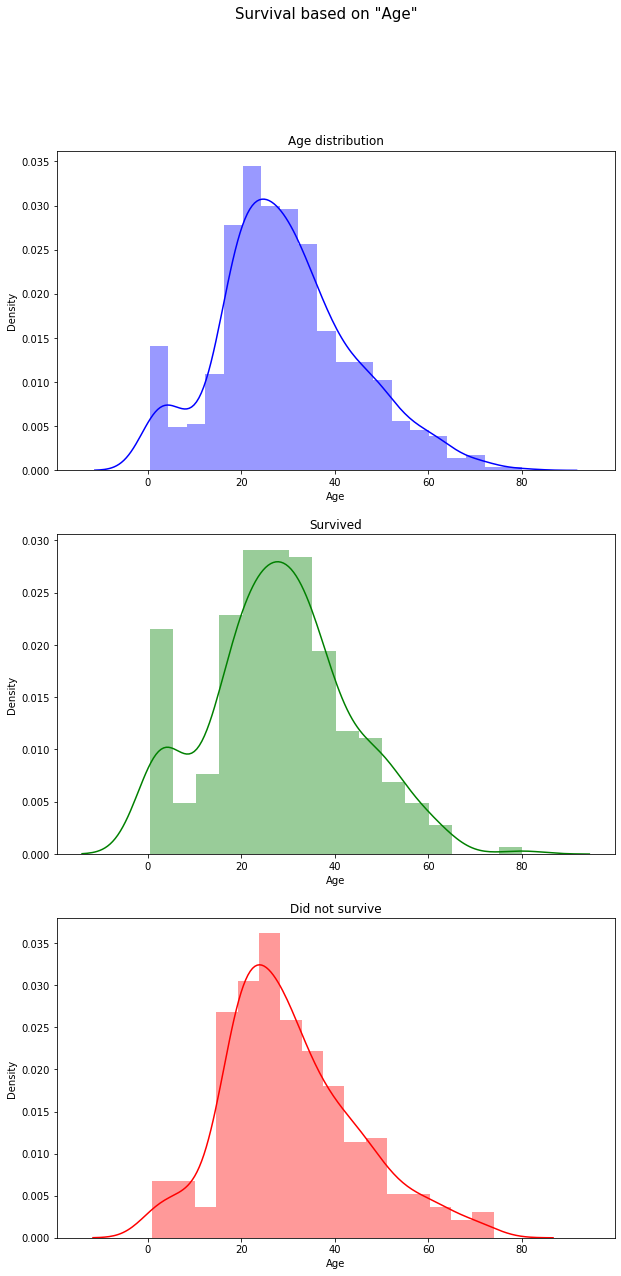

In [7]:
fig = plt.figure(figsize=(10,20))
fig.suptitle("Survival based on \"Age\"", fontsize=15);

age1plot = train_data.loc[train_data["Survived"]==1]
age0plot = train_data.loc[train_data["Survived"]==0]

ax = plt.subplot(3,1,1)
sns.distplot(train_data["Age"],color="blue");
plt.title("Age distribution");

plt.subplot(3,1,2, sharex=ax)
sns.distplot(age1plot["Age"],color="green");
plt.title("Survived");

plt.subplot(3,1,3, sharex=ax)
sns.distplot(age0plot["Age"],color="red");
plt.title("Did not survive");

### Survival based on "Fare"
* Most of the passengers were took low-fare tickets.
* Greater proportion of mid and high-fare ticket passengers were able to survive.
* Lesser proportion of low-fare ticket passengers were able to survive.

/home/chaupatt/.virtualenvs/ltts/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/chaupatt/.virtualenvs/ltts/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/chaupatt/.virtualenvs/ltts/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

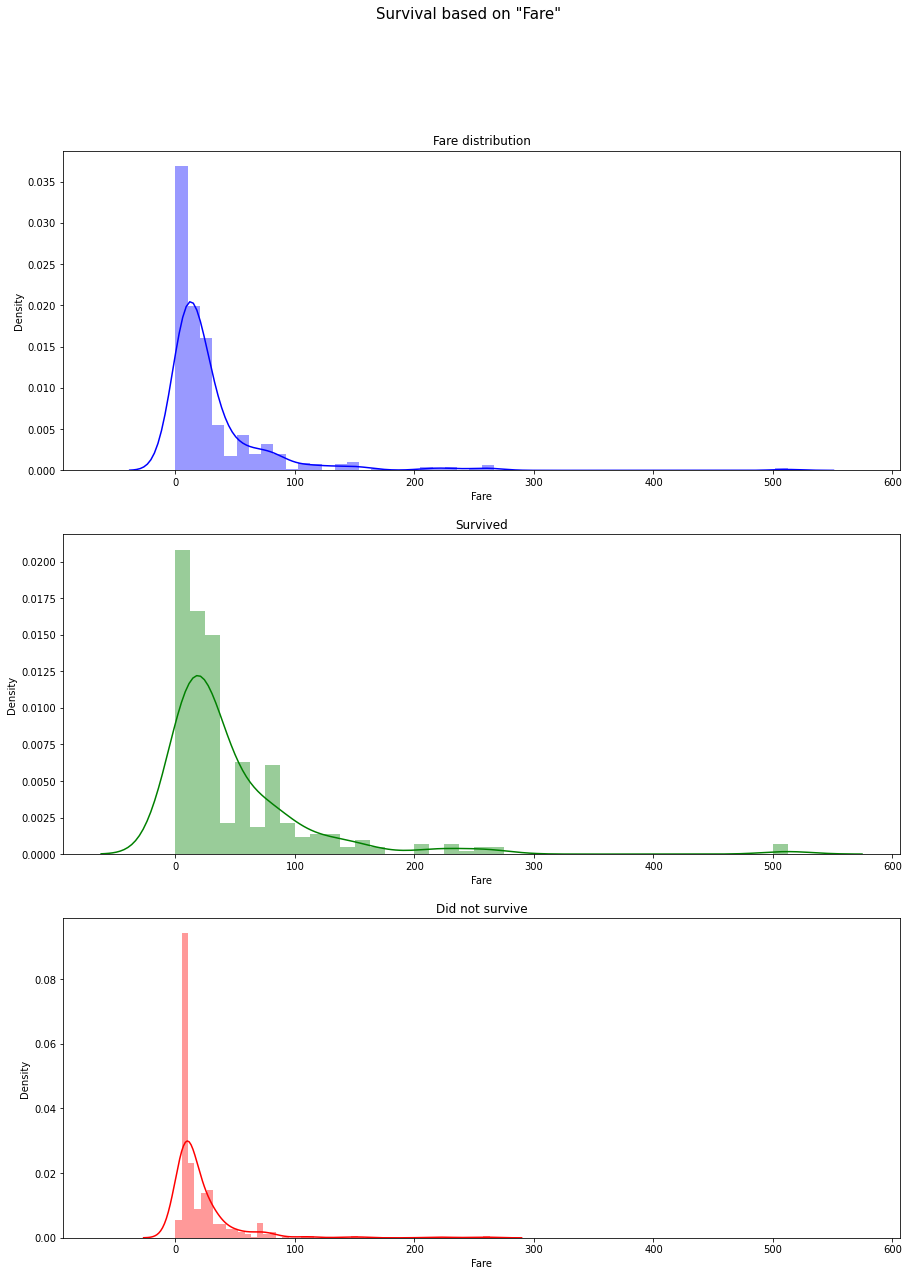

In [8]:
# overlapping histogram plot
fig = plt.figure(figsize=(15,20))
fig.suptitle("Survival based on \"Fare\"", fontsize=15);

fare1plot = train_data.loc[train_data["Survived"]==1]
fare0plot = train_data.loc[train_data["Survived"]==0]

ax = plt.subplot(3,1,1)
sns.distplot(train_data["Fare"].dropna(),color="blue");
plt.title("Fare distribution");

plt.subplot(3,1,2, sharex=ax)
sns.distplot(age1plot["Fare"].dropna(),color="green");
plt.title("Survived");

plt.subplot(3,1,3, sharex=ax)
sns.distplot(age0plot["Fare"].dropna(),color="red");
plt.title("Did not survive");

## Data Pre-processing

### Drop columns
* "Name" - general intuition that survival of a person should not depend on his/her name
* "Ticket" - general intuition that survival of a person should not depend on his/her ticket number
* "Cabin" - too many missing values

In [9]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# drop Name, Ticket and Cabin columns
train_data.drop(labels=["Name","Ticket","Cabin"], axis='columns', inplace=True)
test_data.drop(labels=["Name","Ticket","Cabin"], axis='columns', inplace=True)

display(train_data.head())
display(train_data.describe())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Fill NaN values
[Article](https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/) to know when to fill values with mean, median or mode

/home/chaupatt/.virtualenvs/ltts/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


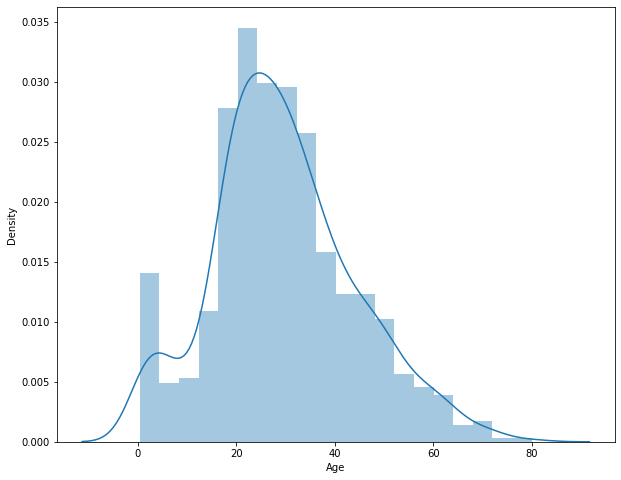

In [12]:
fig, axis = plt.subplots(figsize=(10,8));
sns.distplot(train_data["Age"], ax=axis);

# plot shows data is positive skewed, hence we have to use either median or mode for as filling values.
train_data["Age"].fillna(train_data["Age"].mode()[0], inplace=True)
test_data["Age"].fillna(test_data["Age"].mode()[0], inplace=True)

train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True)

test_data["Fare"].fillna(test_data["Fare"].mode()[0], inplace=True)

display(train_data.describe())
display(train_data.head())

### Data formatting
* Replacing letter and strings with numeric data

In [213]:
# replace male-female and Embarked labels with integers
labels = {"male":0, "female":1}

train_data["Sex"] = train_data["Sex"].map(labels)
test_data["Sex"] = test_data["Sex"].map(labels)

labels = {"S":0, "Q":1, "C":2}
train_data["Embarked"] = train_data["Embarked"].map(labels)
test_data["Embarked"] = test_data["Embarked"].map(labels)

display(train_data.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,2.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0


## Building Machine Learning Model

### Reasons to use Random Forest Classifier
* The problem in hand is a classification problem.
* RFC makes used of a number of decision trees and combines their result for better and stable predictions.
* Easier to implement using <i>sklearn</i>.

In [216]:
X_train = train_data.drop(labels="Survived", axis='columns')
Y_train = train_data["Survived"]
X_test = test_data.copy()

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

sc = random_forest.score(X_train, Y_train)
print(sc)

1.0


### Saving predictions
* Saving predictions to .csv for submission.

In [217]:
result = pd.DataFrame({
    "PassengerId" : test_data["PassengerId"],
    "Survived" : Y_prediction
})

result.to_csv('my_submission.csv', index=False)